In [1]:
import torch
import torchvision
from fastai2.vision.all import *
from utils import *
#import tarfile
from torch.utils.data.dataset import IterableDataset
#path = untar_data('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')

mnist_data = torchvision.datasets.MNIST('',train=True, transform=None, target_transform=None, download=True)
#data_loader = torch.utils.data.DataLoader(mnist_data,batch_size=4,shuffle=True)


In [2]:
#Four files are available on this site:
#train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
#train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
#t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
#t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
Path.BASE_PATH = mnist_data
path.ls()     # Dataset has only training and testing set. We need to create a validation set using DataBlock below

(#2) [Path('/home/jayajasodani/.fastai/data/mnist_png/training'),Path('/home/jayajasodani/.fastai/data/mnist_png/testing')]

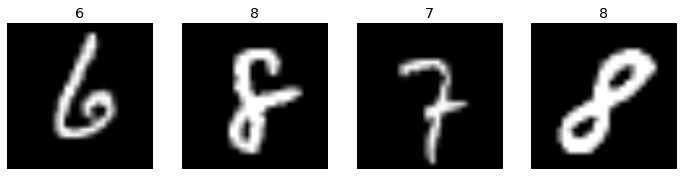

In [5]:
mnist_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
mnist_data

mnst=mnist_data.dataloaders(path)
mnst.valid.show_batch(max_n=4, nrows=1) #Images shown below are from validaton set

In [6]:
(path/'valid').ls   #Now we have a seperate valid(ation) folder

<bound method Path.ls of Path('/home/jayajasodani/.fastai/data/mnist_png/valid')>

In [7]:
ones = (path/'training'/'1').ls().sorted()   # We name the dictionary for each number image type.
twos = (path/'training'/'2').ls().sorted()
threes = (path/'training'/'3').ls().sorted()
fours = (path/'training'/'4').ls().sorted()
fives = (path/'training'/'5').ls().sorted()
sixs = (path/'training'/'6').ls().sorted()
sevens = (path/'training'/'7').ls().sorted()
eights = (path/'training'/'8').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
zeros = (path/'training'/'0').ls().sorted()

In [8]:
im1_path=ones[0]
im1 = Image.open(im1_path)
im1

In [9]:
ones_tensors = [tensor(Image.open(o)) for o in ones] # Here we convert all images to tensors
twos_tensors = [tensor(Image.open(o)) for o in twos]
threes_tensors = [tensor(Image.open(o)) for o in threes]
fours_tensors = [tensor(Image.open(o)) for o in fours]
fives_tensors = [tensor(Image.open(o)) for o in fives]
sixs_tensors = [tensor(Image.open(o)) for o in sixs]
sevens_tensors = [tensor(Image.open(o)) for o in sevens]
eights_tensors = [tensor(Image.open(o)) for o in eights]
nines_tensors = [tensor(Image.open(o)) for o in nines]
zeros_tensors = [tensor(Image.open(o)) for o in zeros]

In [10]:
len(ones_tensors),len(twos_tensors),len(threes_tensors),len(fours_tensors),len(fives_tensors),len(sixs_tensors),len(sevens_tensors),len(eights_tensors),len(nines_tensors), len(zeros_tensors)

(6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949, 5923)

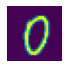

In [11]:
show_image(zeros_tensors[1]);   #show_image function is used when we have tensor(array) to show as an image. Else Image.open

In [12]:
stacked_ones = torch.stack(ones_tensors).float()/255     # convert float value between 0-255 to pixel value 0-1 & stack all ones one above the another
stacked_twos = torch.stack(twos_tensors).float()/255     
stacked_threes = torch.stack(threes_tensors).float()/255
stacked_fours = torch.stack(fours_tensors).float()/255
stacked_fives = torch.stack(fives_tensors).float()/255
stacked_sixs = torch.stack(sixs_tensors).float()/255
stacked_sevens = torch.stack(sevens_tensors).float()/255
stacked_eights = torch.stack(eights_tensors).float()/255
stacked_nines = torch.stack(nines_tensors).float()/255
stacked_zeros = torch.stack(zeros_tensors).float()/255
stacked_ones.shape

torch.Size([6742, 28, 28])

In [13]:
mean1 = stacked_ones.mean(0) # mean(0) means take mean over first dimension of the rank 3 tensor i.e. the number of images
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixs.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)
mean0 = stacked_zeros.mean(0)

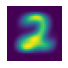

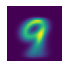

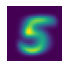

In [14]:
show_image(mean2); show_image(mean9); show_image(mean5);

In [15]:
#Goal is to get input parameters for the learner. Lets define them
#learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)  
#dls:start from train_x

In [16]:
train_x= torch.cat([stacked_ones, stacked_twos, stacked_threes, stacked_fours, stacked_fives, stacked_sixs, stacked_sevens, stacked_eights, stacked_nines, stacked_zeros]).view(-1,28*28) #view shows the rank 3 tensor as rank 2 tensor (without change the original shape)

In [17]:
#Now we need the labels for images. We multiply images with their label and convert to tensor named train_y

In [18]:
train_y = tensor([1]*len(ones)+[2]*len(twos)+[3]*len(threes)+[4]*len(fours)+[5]*len(fives)+[6]*len(sixs)+[7]*len(sevens)+[8]*len(eights)+[9]*len(nines)+[0]*len(zeros)).unsqueeze(1) #Unsqueeze opens up the tensor along axis 1. train_y.numpy()[30500] # to see the value in a tensor, convert it to numpy. A random element 30500 has value 6

In [19]:
train_x.shape, train_y.shape # We have 60000 28*28 input images and 60000 lables i.e. one label per image

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [20]:
dset = list(zip(train_x, train_y)) # Pack the image and its lable in a list to make training dataset

In [21]:
dl=DataLoader(dset, batch_size=256)
len(dl)  # 235 dl * batch_size 256 = 60 160.  

235

In [22]:
xb,yb = first(dl) #first takes first batch of 256 images
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [23]:
#We can feed this dset into the DataLoader directly and start training. But first we prepare test images to a tensor dataset.
entries = os.listdir('.fastai/data/mnist_png/testing') #there is no validation folder in mnist_png
entries

['2', '0', '1', '7', '8', '4', '6', '9', '5', '3']

In [24]:
test_ones = (path/'testing'/'1').ls() 
test_twos = (path/'testing'/'2').ls()
test_threes = (path/'testing'/'3').ls()
test_fours = (path/'testing'/'4').ls()
test_fives = (path/'testing'/'5').ls()
test_sixs = (path/'testing'/'6').ls()
test_sevens = (path/'testing'/'7').ls()
test_eights = (path/'testing'/'8').ls()
test_nines = (path/'testing'/'9').ls()
test_zeros = (path/'testing'/'0').ls()

In [25]:
test_1_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'1').ls()])
test_2_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'2').ls()])
test_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
test_4_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'4').ls()])
test_5_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'5').ls()])
test_6_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'6').ls()])
test_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
test_8_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'8').ls()])
test_9_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'9').ls()])
test_0_tens = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'0').ls()])

In [26]:
test_x= torch.cat([test_1_tens, test_2_tens, test_3_tens, test_4_tens, test_5_tens, test_6_tens, test_7_tens, test_8_tens, test_9_tens, test_0_tens]).view(-1,28*28)

test_y = tensor([1]*len(test_1_tens)+[2]*len(test_2_tens)+[3]*len(test_3_tens)+[4]*len(test_4_tens)+[5]*len(test_5_tens)+[6]*len(test_6_tens)+[7]*len(test_7_tens)+[8]*len(test_8_tens)+[9]*len(test_9_tens)+[0]*len(test_0_tens)).unsqueeze(1)

In [27]:
test_x.shape, test_y.shape # We have 10 000 28*28 input images and 10 000 lables 
test_dset = list(zip(test_x,test_y))
test_dl = DataLoader(test_dset, batch_size= 256)

In [28]:
len(test_dl)   #10 000/256 = 39.0625‬

40

In [40]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_() #1. Initialize the weights

In [78]:
weights = init_params((28*28,1))
bias = init_params(1)

In [79]:
(train_x[0]*weights.T).sum()+bias  # y = w * x + b. Predicted image is '2'

tensor([8.2250], grad_fn=<AddBackward0>)

In [80]:
def linear1(xb): return xb@weights + bias #2. Let us predict all images in training set. 

In [81]:
batch = train_x[:4]
batch.shape  # 4 images
preds = linear1(batch)
preds #len(preds)  # 60 000 images with predictions 2,2,0,.....,4,1,2

tensor([[8.2250],
        [1.3792],
        [1.9926],
        [0.4425]], grad_fn=<AddBackward0>)

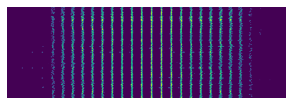

In [66]:
show_image(xb); 

In [67]:
#correct = 0
#correct= preds.max(1,keepdim=True) == train_y
correct = (preds>0.0).float()==train_y[:4]
correct

tensor([[False],
        [ True],
        [ True],
        [False]])

In [68]:
correct.float().mean().item() 

0.5

In [82]:
#weights = init_params((28*28,1))     # weight is the shape of one image
#bias = init_params(1)                #start with bias 1 as initial
weights[0] *= 1.0001

In [83]:
preds = linear1(train_x)
((preds>0.0).float()==train_y).float().mean().item()

0.17880000174045563

In [84]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [85]:
def mnist_loss(predictions, targets):  #Define loss
    predictions = predictions.sigmoid()
    return torch.where(targets ==1, 1-predictions, predictions).mean()  #we take (1-prediction) since function returns LOSS

In [94]:
mnist_loss(prds,trgts)

tensor(0.4460)

In [113]:
weights[0] *= 1.0001
weights = init_params((28*28,1))     # weight is the shape of one image
bias = init_params(1)                #start with bias 1 as initial


In [117]:
def calc_grad(xb,yb,model): #4.Calculate the gradient, which measures for each weight, how changing that weight would change the loss
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()

In [118]:
#weights[0]*=1.0001
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0197), tensor([-0.3522]))

In [119]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0263), tensor([-0.4696]))

In [120]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [121]:
def train_epoch(model,lr,params): #5.Step (that is, change) all the weights based on that calculation.
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data-= p.grad*lr
            p.grad.zero_()

In [122]:
(preds>0.0).float() == train_y

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]])

In [190]:
def batch_accuracy(xb,yb):    #Define metrics
    preds = xb.sigmoid()
    correct = (preds>0.5)==yb                   
    return correct.float().mean()    

In [191]:
#batch_accuracy(batch, train_y[:4])
batch_accuracy(linear_model(batch), train_y[:4])

tensor(0.5000)

In [176]:
def test_epoch(model):
    accs = [batch_accuracy(model(xb.float()), yb) for xb,yb in test_dl] 
    return round(torch.stack(accs).mean().item(),4)

In [177]:
#linear_model = nn.Linear(28*28,1)    
test_epoch(linear1)

0.1191

In [127]:
lr=1.                                            #6.Go back to the step 2, and repeat the process.
params=weights,bias
train_epoch(linear1, lr, params)
test_epoch(linear1)

0.119

In [128]:
for i in range(20):                 #7.Iterate until you decide to stop the training process (for instance, because the model is good enough or you don't want to wait any longer).
    train_epoch(linear1, lr, params)
    print(test_epoch(linear1),end= ' ')

0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 0.1191 

In [129]:
linear_model = nn.Linear(28*28,1) 
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [130]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(test_epoch(model), end=' ')

In [135]:
class BasicOptim: 
    def __init__(self,params,lr): self.params, self.lr = list(params),lr  #double underscore to initialize else error
        
    def step(self, *args, **kwargs):
        for p in self.params: p.data -=p.grad.data*self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad=None      
    

In [136]:
opt= BasicOptim(linear_model.parameters(), lr)

In [137]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()        

In [139]:
test_epoch(linear_model)

0.1191

In [140]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(test_epoch(model), end=' ')

In [141]:
train_model(linear_model, 20)

0.1207 0.1344 0.1471 0.156 0.1628 0.1679 0.1746 0.1791 0.184 0.1871 0.1902 0.1937 0.197 0.1989 0.2011 0.2029 0.2046 0.2061 0.2075 0.209 

In [143]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr) #fastai provides the SGD class which, by default, does the same thing as our BasicOptim:
train_model(linear_model, 20)

0.1191 0.1209 0.1346 0.1469 0.1556 0.1626 0.1675 0.1739 0.1785 0.1833 0.1871 0.1902 0.1934 0.1965 0.1985 0.2012 0.2027 0.2045 0.2059 0.2071 

In [142]:
simple_net=nn.Sequential(nn.Linear(28*28,30), nn.ReLU(),nn.Linear(30,1))  # Define model

In [162]:
dls = DataLoaders(dl, test_dl)

In [195]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss,metrics=batch_accuracy)  #Define learner

In [197]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.001440,0.000002,None,00:01


RuntimeError: The size of tensor a (96) must match the size of tensor b (256) at non-singleton dimension 0